# Data Exploration

In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load dataset Iris dari sklearn
IRIS = load_iris()
df = pd.DataFrame(data=IRIS.data, columns=IRIS.feature_names)

# Tambahkan kolom ID species (1,2,3) dan nama species
df['species'] = IRIS.target + 1
df['species_name'] = df['species'].map({1:'setosa', 2:'versicolor', 3:'virginica'})

# Tambahkan nomor baris mulai dari 1
df.insert(0, 'No', range(1, len(df)+1))

### Statistik Deskriptif Data

Statistik deskriptif ini menampilkan nilai rata-rata, standar deviasi, min, max, dan kuartil untuk semua fitur numerik pada dataset Iris.

In [2]:
print("Statistik Deskriptif Semua Fitur Numerik:")
display(df.describe().round(1))

Statistik Deskriptif Semua Fitur Numerik:


,No,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.0,150.0,150.0,150.0,150.0,150.0
mean,75.5,5.8,3.1,3.8,1.2,2.0
std,43.4,0.8,0.4,1.8,0.8,0.8
min,1.0,4.3,2.0,1.0,0.1,1.0
25%,38.2,5.1,2.8,1.6,0.3,1.0
50%,75.5,5.8,3.0,4.4,1.3,2.0
75%,112.8,6.4,3.3,5.1,1.8,3.0
max,150.0,7.9,4.4,6.9,2.5,3.0


### Distribusi tiap fitur

Berikut adalah histogram untuk masing-masing fitur numerik. KDE digunakan untuk melihat distribusi kemungkinan data secara lebih smooth.



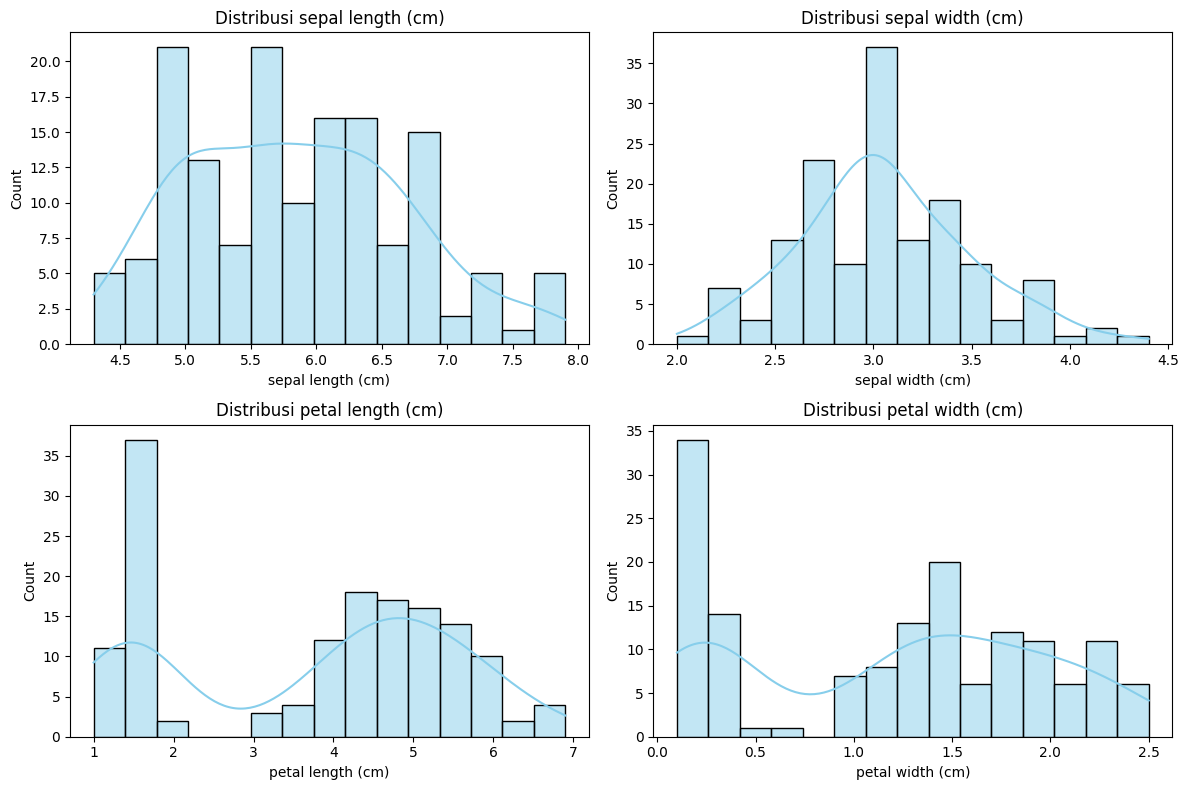

In [3]:
numeric_cols = IRIS.feature_names  

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

### Keterangan Histogram Fitur Numerik :

1. Sepal Length (cm)

- Distribusi relatif mendekati normal, meski sedikit condong ke kanan (positively skewed).

- Sebagian besar nilai berada di kisaran 5.0 – 6.5 cm.

- Ada variasi cukup besar, menandakan fitur ini bisa membantu membedakan spesies.

2. Sepal Width (cm)

- Distribusinya relatif simetris dan mendekati normal distribution.

- Nilai terbanyak sekitar 2.8 – 3.2 cm.

- Ada beberapa nilai ekstrem (outlier), terutama di bagian bawah (< 2.5 cm) dan atas (> 3.8 cm).

3. Petal Length (cm)

- Distribusi menunjukkan pola multimodal (lebih dari satu puncak).

- Menandakan perbedaan antar kelas spesies yang jelas.

- Kelompok pertama (sekitar 1.5 cm) merepresentasikan Setosa, sedangkan kelompok kedua (4 – 6 cm) merepresentasikan Versicolor dan Virginica.

4. Petal Width (cm)

- Sama seperti petal length, distribusi juga terlihat multimodal.

- Nilai kecil (~0.2 cm) khas untuk Setosa, sedangkan nilai lebih besar (1.0 – 2.0 cm) khas untuk Versicolor dan Virginica.

- Distribusi ini memperlihatkan fitur petal width sangat diskriminatif dalam membedakan spesies.

### Ringkasan

- Fitur sepal (length & width) memberikan informasi, tetapi distribusinya lebih overlapped antar spesies.

- Fitur petal (length & width) jauh lebih baik untuk memisahkan spesies, terlihat dari distribusi multimodal yang jelas.

### Deteksi Outlier

In [4]:
num_cols = df.select_dtypes(include="number").columns

# Hitung IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Deteksi outlier
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | 
            (df[num_cols] > (Q3 + 1.5 * IQR)))

print("\n--- Jumlah Outlier per Kolom ---")
print(outliers.sum())

print("\n--- Persentase Outlier per Kolom ---")
print((outliers.sum() / len(df) * 100).round(2).astype(str) + " %")


--- Jumlah Outlier per Kolom ---
No                   0
sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

--- Persentase Outlier per Kolom ---
No                    0.0 %
sepal length (cm)     0.0 %
sepal width (cm)     2.67 %
petal length (cm)     0.0 %
petal width (cm)      0.0 %
species               0.0 %
dtype: object


In [5]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_data = df[(df[col] < lower) | (df[col] > upper)][[col, "species"]]
    
    print(f"\nOutlier pada {col}:")
    if not outlier_data.empty:
        print(outlier_data)
    else:
        print("Tidak ada outlier")


Outlier pada No:
Tidak ada outlier

Outlier pada sepal length (cm):
Tidak ada outlier

Outlier pada sepal width (cm):
    sepal width (cm)  species
15               4.4        1
32               4.1        1
33               4.2        1
60               2.0        2

Outlier pada petal length (cm):
Tidak ada outlier

Outlier pada petal width (cm):
Tidak ada outlier

Outlier pada species:
Tidak ada outlier


### Penjelasan Outlier

1. Kolom No Tidak ada outlier (normal, karena ini cuma nomor urut).

2. Kolom sepal length (cm) Tidak ada nilai ekstrem → semua panjang sepal berada dalam rentang normal.

3. Kolom sepal width (cm) Ada 4 outlier (≈2.67% dari total data):

- 4.4, 4.1, 4.2 (lebih tinggi dari normal → outlier atas)

- 2.0 (lebih rendah dari normal → outlier bawah) Jadi distribusi sepal width agak menyebar lebih luas, dan ada beberapa bunga dengan sepal yang sangat lebar atau sangat sempit dibanding mayoritas.

4. Kolom petal length (cm) Tidak ada outlier → data petal length cenderung stabil.

5. Kolom petal width (cm) Tidak ada outlier → data petal width juga stabil.

6. Kolom species Tidak ada outlier (ini kategori, jadi wajar).

### Kesimpulan 

1. Dataset terdiri dari 150 baris data dan 5 kolom (4 numerik, 1 kategorikal).

2. Tidak ada missing value pada dataset.

3. Sepal length dan petal length menunjukkan korelasi yang cukup tinggi (~0.87).

4. Ditemukan beberapa outlier pada sepal width.

5. Secara umum dataset bersih, terstruktur, dan siap dipakai untuk analisis lebih lanjut (klasifikasi).